# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

### Merge the DataFrames

In [115]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [35]:
#  1. Get the total rides for each city type

total_rides = pyber_data_df.groupby("type").count()["ride_id"]
total_rides


#this is another way to get the exact same output:

#pyber_data_df["type"].value_counts()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [34]:
# 2. Get the total drivers for each city type

total_drivers = city_data_df.groupby("type").sum()["driver_count"]
total_drivers

/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_96156/426100234.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_drivers = city_data_df.groupby("type").sum()["driver_count"]


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [33]:
#  3. Get the total amount of fares for each city type

total_fares = pyber_data_df.groupby("type").sum()["fare"]
total_fares

/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_96156/609436459.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_fares = pyber_data_df.groupby("type").sum()["fare"]


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [36]:
#  4. Get the average fare per ride for each city type. 

avg_fare_per_ride = total_fares / total_rides
avg_fare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [37]:
# 5. Get the average fare per driver for each city type. 

avg_fare_per_driver = total_fares / total_drivers
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [101]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.concat([total_rides, total_drivers, total_fares , avg_fare_per_ride , avg_fare_per_driver], axis = 1)
pyber_summary_df.columns = ["Total Rides" , "Total Drivers", "Total Fares", "Average Fare per Ride", "Average Fare per Driver"]
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [102]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [108]:
#  8. Format the columns.

pyber_summary_df.style.format({"Total Rides" : "{:,.0f}", "Total Drivers" : "{:,.0f}" , "Total Fares" : "${:,.2f}" , "Average Fare per Ride" : "${:,.2f} " , "Average Fare per Driver" : "${:,.2f}"})


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [121]:
# Print the merged DataFrame for reference.

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [125]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

date_fares = pyber_data_df.groupby(["type" , "date"]).sum()["fare"]


/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_96156/622140697.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  date_fares = pyber_data_df.groupby(["type" , "date"]).sum()["fare"]


In [126]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

date_fares = date_fares.reset_index()
date_fares

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [131]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_date_fares = date_fares.pivot("date" , columns= "type" , values= 'fare')
pivot_date_fares




/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_96156/821121763.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_date_fares = date_fares.pivot("date" , columns= "type" , values= 'fare')


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [135]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.

jan_to_may = pivot_date_fares.loc['2019-01-01':'2019-04-28']

#says that the dtype is an object so lets convert to datetime below! 
jan_to_may.index


Index(['2019-01-01 00:08:16', '2019-01-01 00:46:46', '2019-01-01 02:07:24',
       '2019-01-01 03:46:50', '2019-01-01 05:23:21', '2019-01-01 09:45:36',
       '2019-01-01 12:32:48', '2019-01-01 14:40:14', '2019-01-01 14:42:25',
       '2019-01-01 14:52:06',
       ...
       '2019-04-27 14:11:38', '2019-04-27 14:37:32', '2019-04-27 14:57:38',
       '2019-04-27 16:20:00', '2019-04-27 16:22:23', '2019-04-27 17:58:27',
       '2019-04-27 19:45:48', '2019-04-27 20:41:36', '2019-04-27 23:26:03',
       '2019-04-27 23:52:44'],
      dtype='object', name='date', length=2177)

In [136]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

jan_to_may.index = pd.to_datetime(jan_to_may.index)

In [137]:
# 6. Check that the datatype for the index is datetime using df.info()

jan_to_may.info()
#returns that I have a datetime Index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [139]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

weekly_fares = jan_to_may.resample("W").sum()
weekly_fares


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


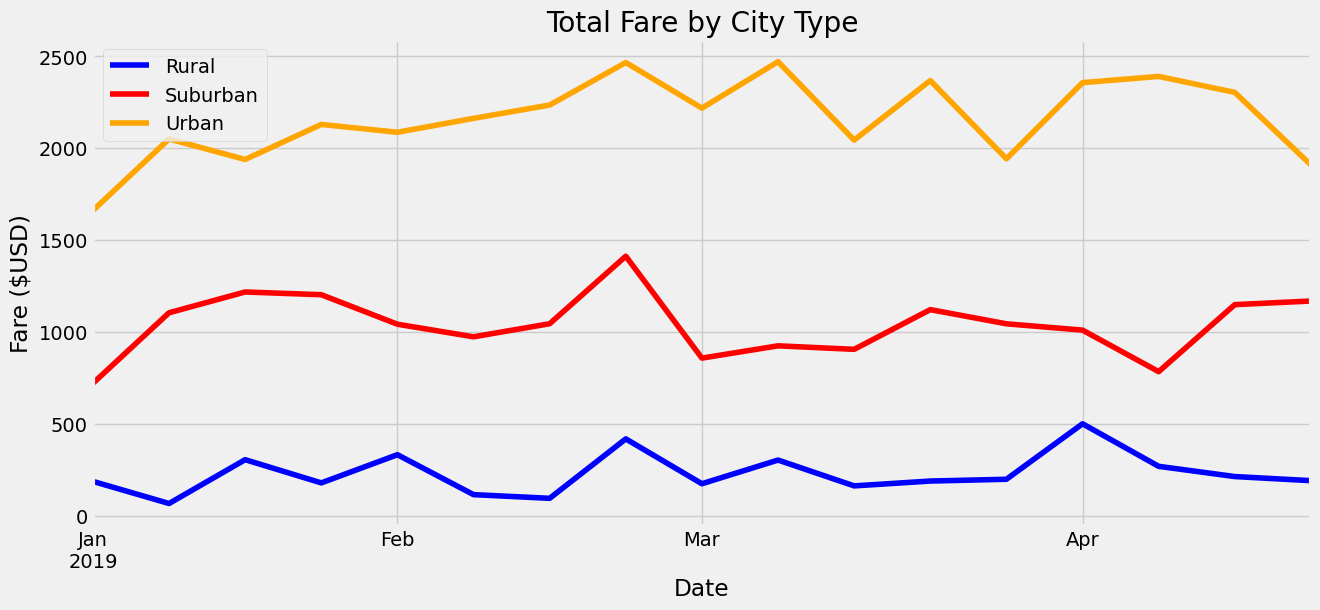

In [159]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 


weekly_fares.plot(kind = 'line' , color = ["b" , "r" , "orange"] , figsize = (14,6))
plt.legend(loc = "best")
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Date")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("Analysis/PyBer_fare_summary.png")

plt.show()